### IESB
___
### Pós Graduação em Inteligência Artificial
#### Disciplina: Estatística e Análise de dados
#### Docente: Mateus Mendelson
#### Discente: Henrique Brandão


# Students Performance

In [1]:
from math import sqrt

import pandas as pd
import seaborn as sns
import plotly.express as px

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
sns.set(style = "darkgrid")

In [3]:
CSV = 'StudentsPerformance.csv'

In [4]:
df = pd.read_csv(CSV)
df.shape, df.columns

((1000, 8),
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
        'test preparation course', 'math score', 'reading score',
        'writing score'],
       dtype='object'))

In [5]:
def _isnull(df):
    _ = []
    for c in df.columns:
        cnt = df[pd.isnull(df[c])].shape[0]
        if cnt != 0:
            _.append(c)
    return _

_isnull(df)

[]

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 1. Cálculos de média, média aparada, média ponderada e mediana (justifique suas escolhas de cada parâmetro) para cada disciplina.

In [7]:
def mediana(x):
    i = len(x)
    if i%2==0:
        i = int(i/2)
        return (x[i-1] + x[i+1])/2
    else:
        i = int((i/2) + 1)
        return x[i]

In [8]:
def media_arit(x):
    return sum(x)/len(x)

In [9]:
def med_apar(x, t):
    return sum(x[t:-t])/len(x)

In [10]:
def med_pond(x):
#     val_freq = dict(zip(set(x), [0 for i in range(len(x))]))
#     for v in x:
#         val_freq[v] += 1
#     return = sum([val * freq for val, freq in val_freq.items()])/len(val_freq)
    return sum(x)/len(set(x))

In [11]:
R1 = {
    'math': {
        'mediana': mediana(df['math score']),
        'media_arit': media_arit(df['math score']),
        'media_apar': med_apar(df['math score'], 10),
        'media_pond': med_pond(df['math score']),
    },
    'reading': {
        'mediana': mediana(df['reading score']),
        'media_arit': media_arit(df['reading score']),
        'media_apar': med_apar(df['reading score'], 10),
        'media_pond': med_pond(df['reading score']),
    },
    'writing': {
        'mediana': mediana(df['writing score']),
        'media_arit': media_arit(df['writing score']),
        'media_apar': med_apar(df['writing score'], 10),
        'media_pond': med_pond(df['writing score']),
    },
}

R1

{'math': {'mediana': 85.0,
  'media_arit': 66.089,
  'media_apar': 64.749,
  'media_pond': 815.9135802469136},
 'reading': {'mediana': 79.0,
  'media_arit': 69.169,
  'media_apar': 67.669,
  'media_pond': 960.6805555555555},
 'writing': {'mediana': 82.0,
  'media_arit': 68.054,
  'media_apar': 66.611,
  'media_pond': 883.8181818181819}}

#### 2.  Cálculos de variância, desvio padrão e `MAD` de cada disciplina.

In [17]:
def variancia(X):
    x_ = media_arit(X)
    return sum([(xi - x_)**2 for xi in X])/len(X) # populacional; len(x-1) para variância amostral

In [18]:
def desvio_padrao(X):
    return sqrt(variancia(X))

In [19]:
def desvio_medio_absoluto(X):
    x_ = media_arit(X)
    return sum([abs(xi - x_) for xi in X])/len(X)

In [20]:
def MAD(X):
    """Mediana do desvio mediano absoluto"""
    mediana_ = mediana(X)
    return mediana([abs(xi - mediana_) for xi in X])

In [21]:
R2 = {
    'math': {
        'variancia': variancia(df['math score']),
        'desvio_padrao': desvio_padrao(df['math score']),
        'desvio_medio_absoluto': desvio_medio_absoluto(df['math score']),
        'MAD': MAD(df['math score'])
    },
    'reading': {
        'variancia': variancia(df['reading score']),
        'desvio_padrao': desvio_padrao(df['reading score']),
        'desvio_medio_absoluto': desvio_medio_absoluto(df['reading score']),
        'MAD': MAD(df['reading score'])
    },
    'writing': {
        'variancia': variancia(df['writing score']),
        'desvio_padrao': desvio_padrao(df['writing score']),
        'desvio_medio_absoluto': desvio_medio_absoluto(df['writing score']),
        'MAD': MAD(df['writing score'])
    },
}

R2

{'math': {'variancia': 229.68907900000048,
  'desvio_padrao': 15.155496659628165,
  'desvio_medio_absoluto': 12.020246,
  'MAD': 9.0},
 'reading': {'variancia': 212.9524390000001,
  'desvio_padrao': 14.59289001534652,
  'desvio_medio_absoluto': 11.778606000000005,
  'MAD': 8.0},
 'writing': {'variancia': 230.6770839999997,
  'desvio_padrao': 15.188057281956757,
  'desvio_medio_absoluto': 12.200703999999996,
  'MAD': 10.0}}

#### 3. Exibição dos histogramas de cada disciplina.

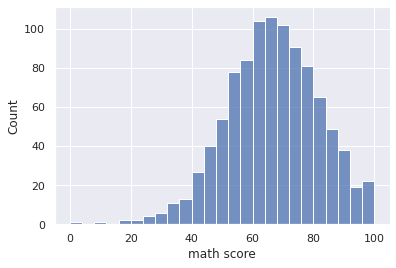

In [22]:
sns.histplot(df['math score'])
plt.show()

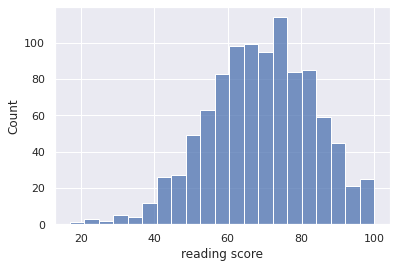

In [23]:
sns.histplot(df['reading score'])
plt.show()

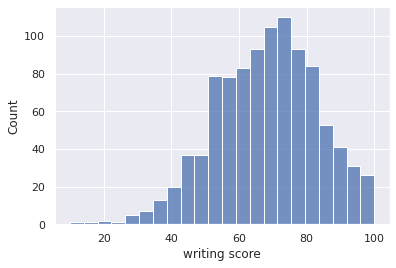

In [24]:
sns.histplot(df['writing score'])
plt.show()

#### 4. Cálculo da matriz de correlação e exibição do respectivo mapa de calor de todas as disciplinas.

Pearson:

$r = \frac{\Sigma_{i=1}^n (x_i - \overline{x}) (y_i - \overline{y}) } {(n-1) s_x s_y}$

In [25]:
def corr():
    pass

#### 5. Visualização 3D das notas das disciplinas separadas por cada grupo de estudantes de acordo com `gender`, `race/ethnicity`, `parental level of education`, `lunch` e `test preparation course`. Para cada um desses parâmetros, realize uma única visualização (colocando os pontos de cada grupo em uma cor). Ao final, discorra se há algum padrão que pode ser detectado nessas análises.

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
ETC = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [37]:
%matplotlib inline

In [40]:
for etc in ETC:
    fig = px.scatter_3d(df, x='math score', y='reading score', z='writing score', color=etc)
    fig.show()

#### 6. Escreva suas conclusões sobre o dataset e quais métricas você julga mais interessantes, ou seja, forneça informações úteis para a tomada de decisões de um diretor de escola.